Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Text(0.5, 0, 'Original')

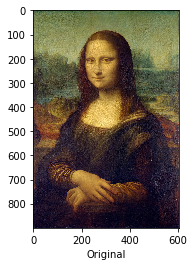

In [2]:
# a: import picture 
pic = plt.imread('F:\Annie\CornellMS\Semester 4\Machine Learning\Homework\HW4\Random_Forest\Mona_Lisa.jpg')
plt.imshow(pic)
plt.xlabel('Original')

(5000, 2)


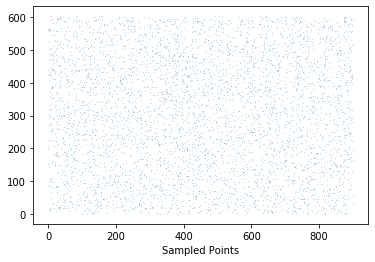

In [3]:
# b: Preprocessing input
samples = np.arange(900*604)
samples_arr = samples.reshape(900,604)
random_samples = np.random.choice(samples,5000)

def grab_xy(samples):
    x,y = [],[]
    for i in samples:
        x.append(np.where(samples_arr == i)[0][0])
        y.append(np.where(samples_arr == i)[1][0])
    xy = np.column_stack((np.array(x,dtype=np.int), np.array(y,dtype=np.int)))
    return(xy)

x_tr = grab_xy(random_samples)
print (x_tr.shape)
# create a white image
plt.scatter(*zip(*x_tr), s=0.01)
plt.xlabel("Sampled Points")
plt.show()

row,col = np.indices((900,604))
x_te = np.column_stack((row.reshape(-1,1),col.reshape(-1,1)))

We did not use any preprocessing as we are using decision tree. Inparticular,we do not need to perform mean subtraction, standardization, or unit-normalization, as decision tree does not get affected by the following.

In [4]:
# c: Preprocess output
def RGB(xy):
    a = []
    for i in range(len(xy)):
        a.append(pic[xy[i][0],xy[i][1]])
    b = np.row_stack(a)
    b = b/255
    return(b)
                    
y_tr = RGB(x_tr)
y_te = RGB(x_te)

For preprocessing the output, we are using the 2nd process. We are regress all three values at once, so your function maps (x,y) coordinates to (r,g,b) value:
f: R2 -> R3 

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Output Prediction Image')

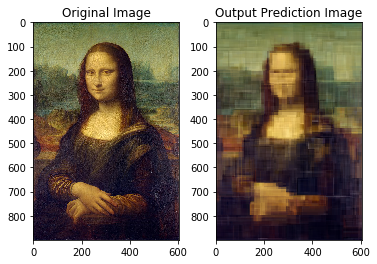

In [5]:
# d: Display random forest
clf = RandomForestRegressor()
clf.fit(x_tr, y_tr)
plt.subplot(1,2,1)
plt.imshow(pic)
plt.title('Original Image')
plt.subplot(1,2,2)
pred_pic = clf.predict(x_te).reshape(pic.shape)
plt.imshow(pred_pic)
plt.title('Output Prediction Image')

No other preprocessing is needed for using random forest.

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_ave

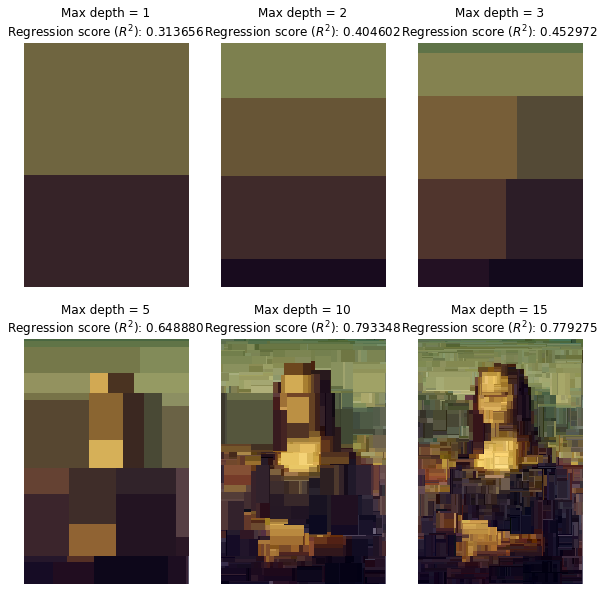

In [6]:
# e: Experimentation with random forest
# i: Single decision tree, but with depths 1, 2, 3, 5, 10, and 15

regression_scores = []
depth = [1,2,3,5,10,15]
plt.figure(figsize=[10, 10])
for i, d in enumerate(depth):
    reg = RandomForestRegressor(n_estimators=1, max_depth=d)
    reg.fit(x_tr, y_tr)
    pic = reg.predict(x_te).reshape(pic.shape)
    plt.subplot(2, 3, i + 1)
    plt.imshow(pic)
    plt.axis('off')
    regression = reg.score(x_te, y_te)
    regression_scores.append(regression)
    plt.title('Max depth = %d\nRegression score ($R^2$): %f' % (d, regression))

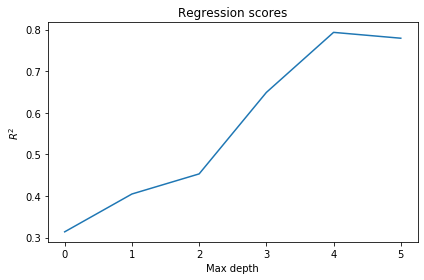

In [7]:
plt.plot(regression_scores)
plt.title('Regression scores')
plt.ylabel('$R^2$')
plt.xlabel('Max depth')
plt.tight_layout()

We see that as we keep on increasing the depth, the method understand more diversity of color. For case depth=1, it becomes a binary case of understanding colors.

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_ave

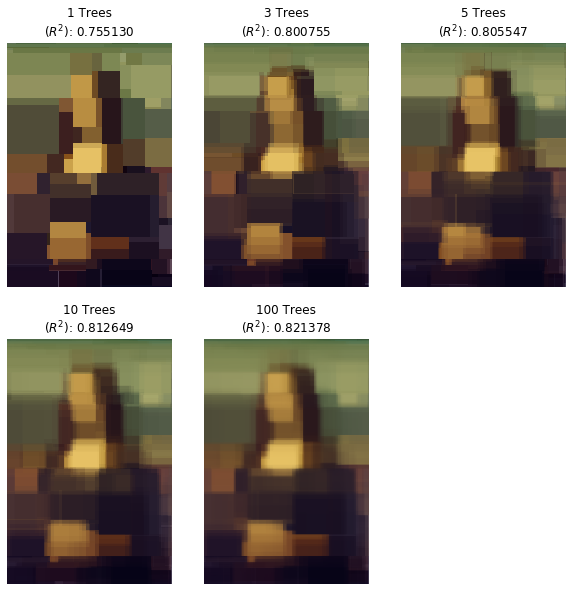

In [8]:
# ii: Depth 7, but with number of trees equal to 1, 3, 5, 10, and 100
regression_scores = []
n_trees = [1,3,5,10,100]
plt.figure(figsize=[10, 10])
for i, n in enumerate(n_trees):
    reg = RandomForestRegressor(n_estimators=n, max_depth=7)
    reg.fit(x_tr, y_tr)
    
    pic = reg.predict(x_te).reshape(pic.shape)
    plt.subplot(2, 3, i + 1)
    plt.imshow(pic)
    plt.axis('off')
    regression = reg.score(x_te, y_te)
    regression_scores.append(regression)
    plt.title('%d Trees\n($R^2$): %f' % (n, regression))

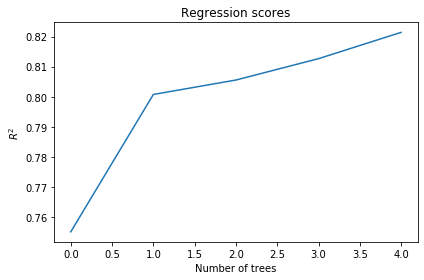

In [9]:

plt.plot(regression_scores)
plt.title('Regression scores')
plt.ylabel('$R^2$')
plt.xlabel('Number of trees')
plt.tight_layout()

We see that each decision tree will end up yielding a different subset of data, which will be resulting in highly correlated predictor, limiting the variance. Thus by increasing the number of trees, we get smoother image.

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


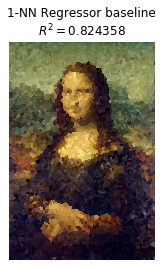

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8243576884558023

In [10]:
# c: knn implementation
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_tr, y_tr)
pic = knn.predict(x_te).reshape(pic.shape)
sc = knn.score(x_te, y_te)
plt.imshow(pic)
plt.axis('off')
plt.title('1-NN Regressor baseline\n$R^2=$%f' % sc)
plt.show()
knn.score(x_te, y_te)

Here in random forest,we split the image based on pixel position of the image compared with the threshold of each subtree in the forest. This is why the image is divided into small blocks of each colors. However in knn, we are assigning the color to nearest one. Hence we don't have a hard boundary.

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_ave

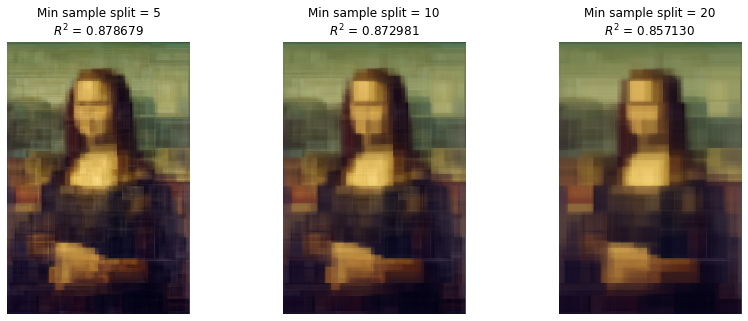

In [13]:
# d: Prunning by min_samples_split
n_trees = 50
max_depth = 20
split_list = [5, 10, 20]
regression_scores = []
plt.figure(figsize=[14, 5])
for i, split in enumerate(split_list):
    reg = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, min_samples_split=split)
    reg.fit(x_tr, y_tr)
    pred = reg.predict(x_te).reshape(pic.shape)
    plt.subplot(1, 3, i+1)
    plt.imshow(pred)
    plt.axis('off')
    sc = reg.score(x_te, y_te)
    regression_scores.append(sc)
    plt.title('Min sample split = %d\n$R^2$ = %f' % (split, sc))

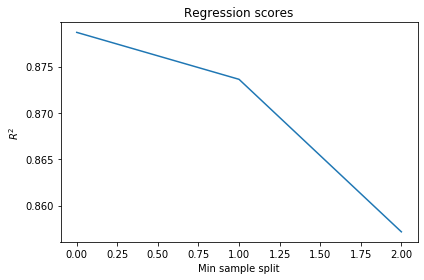

In [12]:
plt.plot(regression_scores)
plt.title('Regression scores')
plt.ylabel('$R^2$')
plt.xlabel('Min sample split')
plt.tight_layout()

C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Chandrima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_ave

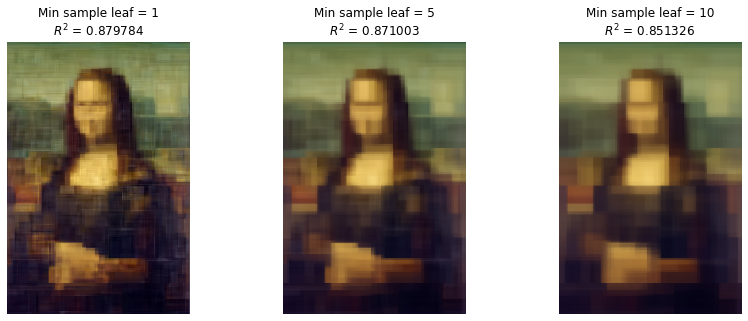

In [14]:
# Prunning by min_samples_leaf
leaf_list = [1, 5, 10]
n_trees = 50
max_depth = 20
regression_scores = []
plt.figure(figsize=[14, 5])
for i, leaf in enumerate(leaf_list):
    reg = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, min_samples_leaf=leaf)
    reg.fit(x_tr, y_tr)
    pred = reg.predict(x_te).reshape(pic.shape)
    plt.subplot(1, 3, i+1)
    plt.imshow(pred)
    plt.axis('off')
    sc = reg.score(x_te, y_te)
    regression_scores.append(sc)
    plt.title('Min sample leaf = %d\n$R^2$ = %f' % (leaf, sc))

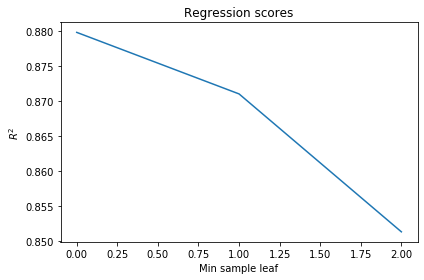

In [15]:
plt.plot(regression_scores)
plt.title('Regression scores')
plt.ylabel('$R^2$')
plt.xlabel('Min sample leaf')
plt.tight_layout()

For prunning, I set no of trees to be 50 and depth to be 20.
I used two prunning methods i.e., min_samples_split and min_samples_leaf.
We see for both, prunning is making it worse; that implies our model is robust and good.

f: Analysis

i. The decision rule at each split point could be defined as the following:
Next node assignment = left_node if x >= some_threshold
                     = right_node, otherwise
Basically, our input is the (x,y) coordinates and we output either a node on the next level of the decision tree, or in the case of the leaf node we output the acutal pixel (R,G,B) value. 

ii. The resulting images look like square patches of color. This is due to the fact that random forest approach segments the image into rectangle bins and assigns colors, giving them a patchy look.

iii. For a single decision tree the number of patches of color will be 2^depth. 
Each leaf should result in a patch of color. This is due to the fact we only have one tree the maximum number of patches will be 2^depth.

iv. For n decision tree, the maximum number of leaves, which is patches of color in this case, should be $n \times 2^d$, where $d$ represents the depth of decision trees.

References:
1. https://github.com/WeimingZhang/ 
2. https://github.com/sidxiong/
    
In collaboration with rmm223